# 人生苦短，我用python——几小时快速上手Python语法

## Python是什么？

**Python简介一览：** [百度百科](https://baike.baidu.com/item/Python/407313?fr=aladdin#1)

## 为什么学 Python？


**知乎回答你：** [为什么要学 Python？](https://www.zhihu.com/question/25627959)

**热度与趋势：** [2021年10月：Python在TIOBE榜单历史上首次排名第一](https://zhuanlan.zhihu.com/p/417777235)

**Python 能做的事情很多：** [应用领域](https://baike.baidu.com/item/Python/407313?fr=aladdin#6)

### 数据爬虫

In [1]:
import pandas as pd 
import requests,re
from lxml import etree

def get_one_paeg(url):
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36 Edg/96.0.1054.62'} 
    res = requests.get(url, headers=headers) 
    html = etree.HTML(res.text)

    rank_num = html.xpath('//*[@id="content"]/div/div[1]/ol/li/div/div[1]/em/text()')
    movie_name = html.xpath('//*[@id="content"]/div/div[1]/ol/li/div/div[2]/div[1]/a/span[1]/text()')
    actors = [i.strip() for i in html.xpath('//*[@id="content"]/div/div[1]/ol/li/div/div[2]/div[2]/p[1]/text()[1]')]
    scores = html.xpath('//*[@id="content"]/div/div[1]/ol/li/div/div[2]/div[2]/div/span[2]/text()')
    comments = [i.strip('人评价') for i in html.xpath('//*[@id="content"]/div/div[1]/ol/li/div/div[2]/div[2]/div/span[4]/text()')]
    release_time = html.xpath('//*[@id="content"]/div/div[1]/ol/li/div/div[2]/div[2]/p[1]/text()[2]')
    inq = html.xpath('//*[@id="content"]/div/div[1]/ol/li/div/div[2]/div[2]/p[2]/span/text()')
    
    df = pd.DataFrame({'rank_num': rank_num,'movie_name': movie_name,'actors': actors,'scores': scores,'comments': comments,'release_time': release_time,'inq': inq,})
    return df

def get_10_page(): 
    df_all = pd.DataFrame()
    for i in range(1):
        url = 'https://movie.douban.com/top250?start={}&filter='.format((i-1)*25)
        df_one = get_one_paeg(url)
        df_all = df_all.append(df_one, ignore_index=True)
    return df_all

df_all = get_10_page()
df_all

,rank_num,movie_name,actors,scores,comments,release_time,inq
0,1,肖申克的救赎,导演: 弗兰克·德拉邦特 Frank Darabont 主演: 蒂姆·罗宾斯 Tim R...,9.7,2523986,\n 1994 / 美国 / 犯罪 剧...,希望让人自由。
1,2,霸王别姬,导演: 陈凯歌 Kaige Chen 主演: 张国荣 Leslie Cheung / 张...,9.6,1876527,\n 1993 / 中国大陆 中国香港...,风华绝代。
2,3,阿甘正传,导演: 罗伯特·泽米吉斯 Robert Zemeckis 主演: 汤姆·汉克斯 Tom ...,9.5,1896298,\n 1994 / 美国 / 剧情 爱...,一部美国近现代史。
3,4,泰坦尼克号,导演: 詹姆斯·卡梅隆 James Cameron 主演: 莱昂纳多·迪卡普里奥 Leo...,9.4,1858086,\n 1997 / 美国 墨西哥 澳大...,失去的才是永恒的。
4,5,这个杀手不太冷,导演: 吕克·贝松 Luc Besson 主演: 让·雷诺 Jean Reno / 娜塔...,9.4,2056741,\n 1994 / 法国 美国 / 剧...,怪蜀黍和小萝莉不得不说的故事。
5,6,美丽人生,导演: 罗伯托·贝尼尼 Roberto Benigni 主演: 罗伯托·贝尼尼 Robe...,9.6,1163295,\n 1997 / 意大利 / 剧情 ...,最美的谎言。
6,7,千与千寻,导演: 宫崎骏 Hayao Miyazaki 主演: 柊瑠美 Rumi Hîragi /...,9.4,1977656,\n 2001 / 日本 / 剧情 动...,最好的宫崎骏，最好的久石让。
7,8,辛德勒的名单,导演: 史蒂文·斯皮尔伯格 Steven Spielberg 主演: 连姆·尼森 Lia...,9.5,970316,\n 1993 / 美国 / 剧情 历...,拯救一个人，就是拯救整个世界。
8,9,盗梦空间,导演: 克里斯托弗·诺兰 Christopher Nolan 主演: 莱昂纳多·迪卡普里...,9.3,1821224,\n 2010 / 美国 英国 / 剧...,诺兰给了我们一场无法盗取的梦。
9,10,忠犬八公的故事,导演: 莱塞·霍尔斯道姆 Lasse Hallström 主演: 理查·基尔 Richa...,9.4,1249724,\n 2009 / 美国 英国 / 剧...,永远都不能忘记你所爱的人。


### 数据处理

In [ ]:
import os # 批量合并表格
import pandas as pd
df = pd.DataFrame()
for i in os.listdir('./Excel_Files/files/'):
    print(i)
    df = df.append(pd.read_csv('./Excel_Files/files/' + i))
# data = pd.concat(fs)
print('已经全部完成')
df

### 数据可视化

In [1]:
# 使用pyecharts绘制南丁格尔玫瑰图

# 导入包
from pyecharts.charts import Pie
from pyecharts import options as opts

# 准备数据：省份和对应的连续多日疫情零新增数量、颜色序列
provinces = ['西藏', '澳门', '青海', '贵州', '新疆',
             '江苏', '内蒙古', '陕西', '海南', '云南',
             '吉林', '山西', '重庆', '广西', '福建',
             '江西', '安徽', '河北', '天津', '湖南',
             '辽宁', '宁夏', '浙江', '四川', '上海',
             '黑龙江', '北京']
number = [42, 37, 35, 24, 23, 22, 22, 21, 21, 20, 17, 16, 16,
       16, 14, 13, 13, 13, 13, 12, 9, 8, 7, 7, 1, 1, 1]
color_series = ['#FAE927','#E9E416','#C9DA36','#9ECB3C','#6DBC49',
              '#37B44E','#3DBA78','#14ADCF','#209AC9','#1E91CA',
              '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#6A368B'
              '#7D3990','#A63F98','#C31C88','#D52178','#D5225B',
              '#D02C2A','#D44C2D','#F57A34','#FA8F2F','#D99D21',
              '#CF7B25','#CF7B25','#CF7B25']

# 创建饼图
pie = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))

# 添加数据
pie.add("", [list(z) for z in zip(provinces, number)],
        radius=["30%", "135%"],
        center=["50%", "65%"],
        rosetype="area"
        )

# 设置全局配置
pie.set_global_opts(title_opts=opts.TitleOpts(title='\t\t\t\t\t\t\t多省市\n确诊病例连续多日',
                                              subtitle='\t\t\t零新增',
                                              pos_left='42.5%', pos_right='50%',
                                              pos_top='60%', pos_bottom='50%',
                                              title_textstyle_opts=opts.TextStyleOpts(font_size=25),
                                              subtitle_textstyle_opts=opts.TextStyleOpts(font_size=30,
                                                                                         font_family='monospace',
                                                                                         font_style='normal',
                                                                                         background_color='red',
                                                                                         rich={'color': 'red'})
                                              ),
                    legend_opts=opts.LegendOpts(is_show=False)
                   )

# 设置系列配置和颜色
pie.set_series_opts(label_opts=opts.LabelOpts(
                    is_show=True, position="inside", font_size=12,
                    formatter="{b}:{c}天", font_style="italic",
                    font_weight="bold", font_family="Microsoft YaHei"
                                              )
                    )

pie.set_colors(color_series)

# 在网页生成图片
# pie.render('南丁格尔玫瑰图.html') 
pie.render_notebook()

### 数据挖掘/分析

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

# 建立决策树
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
clf = clf.fit(iris.data, iris.target)

# 可视化
# 决策树可视化
dot_data = tree.export_graphviz(decision_tree=clf,
                                 out_file=None, 
                                 feature_names=iris.feature_names,
                                 class_names=iris.target_names, 
                                 filled=True,
                                 rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

### 自动化办公：一样的工作，你要花1小时，我只要 10 秒钟

In [ ]:
from docx import Document
import xlrd
import pandas as pd


def change_text(old_text, new_text):
    all_paragraphs = document.paragraphs
    for paragraph in all_paragraphs:
        for run in paragraph.runs:
            run_text = run.text.replace(old_text, new_text)
            run.text = run_text

    all_tables = document.tables
    for table in all_tables:
        for row in table.rows:
            for cell in row.cells:
                cell_text = cell.text.replace(old_text, new_text)
                cell.text = cell_text


xlsx = xlrd.open_workbook('Excel_Files/合同信息表.xlsx')
sheet = xlsx.sheet_by_index(0)

for table_row in range(1, sheet.nrows):
    document = Document("Word_Files/修改模板.docx")
    for table_col in range(0, sheet.ncols):
        change_text(str(sheet.cell_value(0, table_col)), str(sheet.cell_value(table_row, table_col)))

    document.save("Word_Files/%s合同.docx" % str(sheet.cell_value(table_row, 2)))
    print("%s合同完成" % str(sheet.cell_value(table_row, 2)))

## 学习目的

希望通过简单的入门学习，你会：

    1、 掌握基本的python语法，并编写简单的python程序
    2、 可以阅读别人写的python代码
    3、 编写简单的爬虫
    4、 进行基本的数据分析

## 机器学习需要：
    1、 数学理论知识  (统计、线性代数、微积分 。。。)
    2、 编程能力（python)

## python的特性

[百度百科](https://baike.baidu.com/item/Python/407313?fr=aladdin#2)

    1、python语法简单，容易理解，容易学习
    2、跨平台，可在windows/linux/mac os等系统上运行
    3、可以做网站、爬虫、大数据处理、机器学习
    4、拥有强大、丰富的第三方库  numpy、pandas ...

# 几小时快速上手Python

## 简单尝试

In [6]:
print("Hello, World!")

Hello, World!


In [13]:
'hello python!'

'hello python!'

In [14]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


python之禅  
                作者：Tim Peters

优美胜于丑陋                                                  Python 以编写优美的代码为目标
明了胜于晦涩                                                  优美的代码应当是明了的，命名规范，风格相似 
简洁胜于复杂                                                  优美的代码应当是简洁的，不要有复杂的内部实现 
复杂胜于凌乱                                                  如果复杂不可避免，那代码间也不能有难懂的关系，要保持接口简洁 
扁平胜于嵌套                                                  优美的代码应当是扁平的，不能有太多的嵌套
间隔胜于紧凑                                                  优美的代码有适当的间隔，不要奢望一行代码解决问题 
可读性很重要                                                  优美的代码是可读的 
即便假借特例的实用性之名，也不可违背这些规则                        这些规则至高无上 
不要包容所有错误，除非你确定需要这样做                             精准地捕获异常，不写 except:pass 风格的代码 
当存在多种可能，不要尝试去猜测 
而是尽量找一种，最好是唯一一种明显的解决方案                        如果不确定，就用穷举法
虽然这并不容易，因为你不是Python之父                             这里的 Dutch 是指 Guido 
做也许好过不做，但不假思索就动手还不如不做                          动手之前要细思量
如果你无法向人描述你的方案，那肯定不是一个好方案；反之亦然             方案测评标准
命名空间是一种绝妙的理念，我们应当多加利用                          倡导与号召

## Python like English

### 实例：求数字a的绝对数

In [16]:
a = 30 ## 赋值 

if a >= 0:
    print(a) # 缩进 空格
else:
    print(-a) # 打印

30


### Python VS English

| 英语 | Python   | 例如 |
| :---- | :---- | :---- |
| **单词** | 数据、数据类型 | 列表、字符串、字典等          |
| **语法** | 语法/逻辑语句 | if条件判读语句、for循环语句等 |


### 每天进步一点点

Text(0.5, 1.0, 'Be better everyminute!')

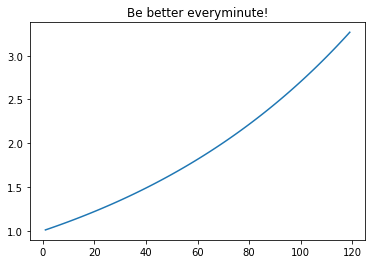

In [18]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

ability = 1
scale = 1.01
records = []

days = range(1, 60*2)
for day in days:
    ability = ability*scale
    records.append(ability)
    
plt.plot(days, records)
plt.title('Be better everyminute!')

### Python是面向对象的编程语言

| 类型   | 实例(对象)   | 实例(对象)   | 方法      |
|:--- | :---- | :--- | :-----|
| 猪  | 村东头老王家的猪  | 把猪变成肉 | ``猪.产肉``  |
| 牛  | 村东头老张家的耕牛  | 把粮食变成畜力   | ``牛.耕地``   |
| 列表 | ``hobbies = ['跑步',  '乒乓球'， '篮球'，'篮球']``|统计某群体爱好的分布, 查看各爱好的人数|``hobbies.count('篮球')``  |
| 字符串| ``str1 = "Hello，World!"``| 将文本内容由World更改为Python | ``str1.replace('World', 'Python')``|
| 字典 | ``grade = {'David':98, 'Mary':88,...}``| 方便数据检索| ``grade.get('David')`` |
| ...  | ... | ... | ... |



### Python中的数据类型

| 数据类型 | 例子     |
| :-:|:-: |
| 数字     | ``a = 5``                              |
| 字符串   | ``my_str = "abcdefg"``                 |
| 列表     | ``my_list = [1, 2, 3]``                |
| 元组     | ``my_tuple = (1, 2, 3)``               |
| 字典     | ``my_dict = {'David': 25, 'Mark':30}`` |
| 空值     | ``None``                               |

## 数据类型：字符串str

### 定义
字符串是以  **单引号**  或  **双引号**  或 **三引号** 括起来的任意文本，如
- 'abc'
- "abc"
- '''abc'''
- """abc"""

In [19]:
a = 'abc'
a

'abc'

In [24]:
"ab张凯恒c"

'ab张凯恒c'

In [21]:
'''abc'''

'abc'

In [22]:
"""abc""" # 单包双

'abc'

In [ ]:
print('abc')
print("abc")
print('''abc''')
print("""abc""")

In [ ]:
'abc'
'efg'

In [ ]:
print('abc')
print('efg')

**注意**:  
- 这里所说的引号都是英文引号
- ``''`` 或 ``""`` 本身不是字符串的一部分，因此，字符串 ``'abc'`` 只有a，b，c这3个字符。
- notebook中只显示最后一个，所以这里用了两个print

### 拼接+
按顺序拼接

In [25]:
a = 'P'
b = 'ython'

print(a+b)
print(b+a)

Python
ythonP


### 切片
![](img/字符串索引.png)

In [29]:
name = 'My Name is Mike'
print(name[0])
name[-15]

M


'M'

In [34]:
name[3:6]
name[-12:-9]
name[0:2]
name[:2]
name[5:]
name[-7:]

'is Mike'

#### 切片总结
|切片表达式|解读|
|:---|:---|
|**从左往右**|索引值从0开始，0表示'第一个'|
|**从右向左**|-1表示倒数第一个，-2表示倒数第二个|
|**a:b**|选取列表索引位置为``a，a+1...b-2, b-1``的值|
|**a:**|选取列表中a之后的所有元素(含a)|
|**:b**|选取列表中b之前的所有元素(不含b)|

### 字符串常用方法
|字符串常用方法|功能|
|:---|:---|
|str.lower()  |变小写|
|str.upper()|变大写|
|str.split(sep) |使用sep将字符串分割，默认sep为空格|
|str.replace(old, new) |将str中的old替换为new|
|str.format()| 向str中填充内容|

In [35]:
words = 'Python is poweful!'
words.lower()

'python is poweful!'

In [36]:
words.upper()

'PYTHON IS POWEFUL!'

In [37]:
words

'Python is poweful!'

In [38]:
words.split(' ')

['Python', 'is', 'poweful!']

In [39]:
words.replace('Python', 'Python programing language')

'Python programing language is poweful!'

需要发送每个员工的工资组成详情。

```
"张三,你这个月的工资是2310元；以下是你的工资详情。。。。"
"李四,你这个月的工资是3456元；以下是你的工资详情。。。。"
"王五,你这个月的工资是2431元；以下是你的工资详情。。。。"
```

如何自动化自动化填充?

In [40]:
template = '{name},你这个月的工资是{salary}元；以下是你的工资详情'

print(template.format(name='张三', salary='2310'))
print(template.format(name='李四', salary='3456'))
print(template.format(name='王五', salary='2431'))

张三,你这个月的工资是2310元；以下是你的工资详情
李四,你这个月的工资是3456元；以下是你的工资详情
王五,你这个月的工资是2431元；以下是你的工资详情


### 转义符\

如果字符串内部既包含 **单引号** 又包含 **双引号**， 会发生什么？

In [41]:
print('I'm "OK"!')

SyntaxError: invalid syntax (Temp/ipykernel_10264/2605556670.py, line 1)

In [42]:
# 可以用 转义字符\ 来标识，比如：
print('I\'m \"OK\"!')

I'm "OK"!


常见的转义符还有

- ``\n`` 换行
- ``\t`` 制表符
- ``字符\`` 本身也要转义，所以 ``\\`` 表示的字符就是 ``\``

可以print()打印字符串看看下面打印结果是?：

```python
print('Hello\tWorld!')
print('转义\n换行!')
print('反斜杠线\\')
```

In [43]:
print('Hello\tWorld!')
print('Hello World!')

Hello	World!
Hello World!


In [44]:
print('转义\n换行!')

转义
换行!


In [46]:
print('反斜杠线\\')

反斜杠线\


### r
如果字符串里面有很多字符都需要转义，就需要加很多``\``,

为了简化，Python还允许用``r''``表示``''内部``的字符串默认不转义,例如

```python
print('\\\t\\')
print(r'\\\t\\')
print('hello world!')
```

In [47]:
print('\\\t\\')

\	\


In [49]:
print(r'\\\t\\')

\\\t\\


## 数据类型：列表list 元素 集合set
### 定义

list是一种有序的集合,内部可以由任何数据类型的组成的

现在有5位员工的汇总信息，

|id|姓名|年龄|性别|爱好|
|:---|:---|:---|:---|:---|
|1|David|25|Male|Basketball, Pingpang, Hiking|
|2|Mary|23|Female|Reading, Movies|
|3|Henry|23|Male|Diving, Hiking|
|4|Swift|21|Male|Football, Music|
|5|Lenard|26|Male|Stay at Home|

In [50]:
names = ['David', 'Mary', 'Henry', 'Swift', 'Lenard']

ages = [25, 23, 23, 21, 26]

hobbies = [['Basketball', 'Pingpang', 'Hiking'],
          ['Reading', 'Movies'],
          ['Diving', 'Hiking'],
          ['Football', 'Music'],
          ['Stay at Home']]

print(type(names))
print(type(ages))
print(type(hobbies))

print(names)
print(ages)
print(hobbies)

<class 'list'>
<class 'list'>
<class 'list'>
['David', 'Mary', 'Henry', 'Swift', 'Lenard']
[25, 23, 23, 21, 26]
[['Basketball', 'Pingpang', 'Hiking'], ['Reading', 'Movies'], ['Diving', 'Hiking'], ['Football', 'Music'], ['Stay at Home']]


### 拼接

In [51]:
a1 = ['Michael', 'Bob']
a2 = ['David', 'Lee']

print(a1 + a2 + a1)
print(a2 + a1)

['Michael', 'Bob', 'David', 'Lee', 'Michael', 'Bob']
['David', 'Lee', 'Michael', 'Bob']


### 拆包
等号两边长度相同

In [54]:
name, age = ['David', 25]
print(name)
print(age)

David
25


### 切片
列表的切片与字符串类似

|id|姓名|年龄|性别|爱好|正索引|倒索引|
|:---|:---|:---|:---|:---|:---|:---|
|1|David|25|Male|Basketball, Pingpang, Hiking|0|-5|
|2|Mary|23|Female|Reading, Movies|1|-4|
|3|Henry|23|Male|Diving, Hiking|2|-3|
|4|Swift|21|Male|Football, Music|3|-2|
|5|Lenard|26|Male|Stay at Home|4|-1|

In [55]:
names = ['David', 'Mary', 'Henry', 'Swift', 'Lenard']
print(names)
print(names[2])
print(names[-3])
print(names[0:3])
print(names[-5:-2])
print(names[2:])
print(names[-3:])
print(names[:2])
print(names[:-3])

['David', 'Mary', 'Henry', 'Swift', 'Lenard']
Henry
Henry
['David', 'Mary', 'Henry']
['David', 'Mary', 'Henry']
['Henry', 'Swift', 'Lenard']
['Henry', 'Swift', 'Lenard']
['David', 'Mary']
['David', 'Mary']


### 列表常用方法
|常用方法|功能|
|:---|:---|
|list.append(a) |向list中添加元素a|
|list.extend(lst)|向list中添加列表lst|
|list.count(a) |统计list中a的个数|

In [56]:
names = ['David', 'Mary', 'Henry', 'Swift', 'Lenard']

print(names)
names.append('Mary')
print(names)

['David', 'Mary', 'Henry', 'Swift', 'Lenard']
['David', 'Mary', 'Henry', 'Swift', 'Lenard', 'Mary']


In [57]:
names = ['David', 'Mary', 'Henry', 'Swift', 'Lenard']

print(names)

names.extend(['Mary'])

print(names)

['David', 'Mary', 'Henry', 'Swift', 'Lenard']
['David', 'Mary', 'Henry', 'Swift', 'Lenard', 'Mary']


In [58]:
ages = [25, 23, 23, 21, 26]
print(ages.count(23))

2


In [59]:
one = ['David']
print(one[-1])
print(one[0])

David
David


### 元组tuple
形似列表，也有
- 元组拼接
- 切片
- 拆包

In [60]:
name_list = ['David', 'Mary', 'Henry', 'Swift', 'Lenard']
name_tuple = ('David', 'Mary', 'Henry', 'Swift', 'Lenard')

print(type(name_list))
print(type(name_tuple))

print(name_list)
print(name_tuple)

<class 'list'>
<class 'tuple'>
['David', 'Mary', 'Henry', 'Swift', 'Lenard']
('David', 'Mary', 'Henry', 'Swift', 'Lenard')


In [61]:
print(name_list==name_tuple)

False


### 集合

In [63]:
names2 = ['David', 'Mary', 'David', 'Swift', 'David']
set(names2)

{'David', 'Mary', 'Swift'}

### 集合的方法
- setdata.add(ele)  向setdata中加入ele

In [66]:
name_set = set(names2)

print(name_set)

name_set.add('William')

print(name_set)

{'David', 'Mary', 'Swift'}
{'David', 'William', 'Mary', 'Swift'}


### 集合不能切片

In [67]:
name_set[2]

TypeError: 'set' object is not subscriptable

## 数据类型：字典dict

字典是有key，有value的 key-value-pair类型数据（键-值对）

|id|姓名|年龄|性别|爱好|
|:---|:---|:---|:---|:---|
|1|David|25|Male|Basketball, Pingpang, Hiking|
|2|Mary|23|Female|Reading, Movies|
|3|Henry|23|Male|Diving, Hiking|


将上面的员工信息以关键词``name、age、hobbies`` 组织成字典数据

### 空字典

In [68]:
david = dict()
print(david)

{}


### 填充

In [69]:
david['age'] = 23
print(david)

{'age': 23}


In [70]:
david['hobbies'] = ['Basketball', 'Pingpang', 'Hiking']
print(david)

{'age': 23, 'hobbies': ['Basketball', 'Pingpang', 'Hiking']}


In [71]:
david['gender'] = 'Male'
print(david)

{'age': 23, 'hobbies': ['Basketball', 'Pingpang', 'Hiking'], 'gender': 'Male'}


### 更新

In [72]:
david['age'] = 25
print(david)

{'age': 25, 'hobbies': ['Basketball', 'Pingpang', 'Hiking'], 'gender': 'Male'}


### 完整的信息


key-value组成的。

字典可以嵌套字典

字典也可以存储列表、字符串、数字等等。

In [74]:
infos =  {'David':{'age':25, 
                   'gender':'Male',
                   'hobbies':['Basketball', 'Pingpang', 'Hiking']},
          'Mary':{'age':23,
                  'gender': 'Female',
                  'hobbies': ['Reading', 'Movies']},
          'Henry':{'age':23,
                  'gender': 'Male',
                  'hobbies': ['Diving', 'Hiking']}
         }

print(infos)

{'David': {'age': 25, 'gender': 'Male', 'hobbies': ['Basketball', 'Pingpang', 'Hiking']}, 'Mary': {'age': 23, 'gender': 'Female', 'hobbies': ['Reading', 'Movies']}, 'Henry': {'age': 23, 'gender': 'Male', 'hobbies': ['Diving', 'Hiking']}}


### 字典的方法
|方法|效果|
|:---|:---|
|dictdata.items()|返回dictdata所有item|
|dictdata.keys()|返回dictdata的所有关键词|
|dictdata.values()|返回dictdata的所有值|
|``dictdata.get(keystr)``|获取关键词keystr对应的值|
|``dictdata[keystr]``|获取关键词keystr对应的值|

In [75]:
infos.items()

dict_items([('David', {'age': 25, 'gender': 'Male', 'hobbies': ['Basketball', 'Pingpang', 'Hiking']}), ('Mary', {'age': 23, 'gender': 'Female', 'hobbies': ['Reading', 'Movies']}), ('Henry', {'age': 23, 'gender': 'Male', 'hobbies': ['Diving', 'Hiking']})])

In [77]:
#把infos.items()转化为列表
list(infos.items())[0]

('David',
 {'age': 25,
  'gender': 'Male',
  'hobbies': ['Basketball', 'Pingpang', 'Hiking']})

In [78]:
infos.keys()

dict_keys(['David', 'Mary', 'Henry'])

In [79]:
infos.values()

dict_values([{'age': 25, 'gender': 'Male', 'hobbies': ['Basketball', 'Pingpang', 'Hiking']}, {'age': 23, 'gender': 'Female', 'hobbies': ['Reading', 'Movies']}, {'age': 23, 'gender': 'Male', 'hobbies': ['Diving', 'Hiking']}])

In [81]:
print(infos['David'])
print(infos.get('David'))

{'age': 25, 'gender': 'Male', 'hobbies': ['Basketball', 'Pingpang', 'Hiking']}
{'age': 25, 'gender': 'Male', 'hobbies': ['Basketball', 'Pingpang', 'Hiking']}


两种功能等同，但是get获取方法更加安全稳定。例如

In [82]:
print(infos['Will'])

KeyError: 'Will'

In [83]:
print(infos.get('Will'))

None


## 数据类型：布尔值Boolean

用于逻辑判断，一般与if结合使用。

In [84]:
a = True
print(a)

True


In [85]:
True

True

In [86]:
False

False

其他产生布尔值的方式
- 布尔运算
- 比较运算
- 成员运算


### 布尔运算
运算符号|功能|例子|等于
:---|:---|:---|:---
x and y|且|True and False|False
x or y|或|True or False|True
not x|非|not True|False

In [87]:
x = True and False
print(x)

False


In [88]:
x = True or False
print(x)

True


In [89]:
x = not True
print(x)

False


In [90]:
x = not False
print(x)

True


### 比较运算
比较运算符号|功能|例子|等于
:---|:---|:---|:---
==|相等|5==3|False
!=|不等于|5!=3|True
``>``|大于|``5>3``|True
``<``|小于|``5<3``|False
``<=``|小于等于|``5<=3``|False
``>=``|小于|``5>=3``|True

In [91]:
a = 5
b = 3

x = a<b
print(x)
print(type(x))

False
<class 'bool'>


In [93]:
print(5==5)

True


In [94]:
print(5!=5)

False


**注意**

比较符两侧必须为同样的数据类型

In [95]:
a = '5'
b = 5

print(a>b)

TypeError: '>' not supported between instances of 'str' and 'int'

In [96]:
a = '5'
b = '5'
print(a==b)

True


### 成员运算符in

|案例|结果|
|:---|:---|
|``4 in [1,2,4]``|True|
|``4 not in [1,2,4]``|False|
|``3 in [1,2,4]``|False|
|``3 not in [1,2,4]``|True|

In [97]:
x = 4 in [1,2,4]
x

True

In [98]:
y = 4 not in [1,2,4]
y

False

### None
特殊的空值，类似于C语言中的Null。

In [99]:
None

In [100]:
''

''

In [ ]:
[]

In [101]:
dict()

{}

In [102]:
type(None)

NoneType

## 逻辑语句(if&for&tryexcept)

### if条件判断
![](img/if图.png)

### condition为布尔值、布尔运算、成员运算符
通常我们理解的condition为布尔值

In [103]:
#Tab
condition = True

if condition:
    print('condition为True')
else:
    print('condition为False')

condition为True


In [106]:
age = 16
if age>=18:
    print('你是成年人了')
else:
    print('你还是个孩子')

你还是个孩子


In [107]:
age = 20

if age>=55:
    print('老年人')
elif 35<=age<55:
    print('中年')
elif 18<=age<35:
    print('青年')
elif 0<=age<18:
    print('儿童')


青年


### 特殊的conditon
- 各种空值(空字符串、空列表等)作用等同于False
- 各种非空值，作用等同于True

In [108]:
a = None

if a:
    print('a是非空数据')
else:
    print('a是空数据')

a是空数据


### for循环
- 重复做某件事
- 迭代出数据中的内容(元素)
![](img/for循环.png)

上面这个图可以解读为

我们想对iterable这个集合中的每一个item:
    
    做点事(对item做操作)

重复做某事

问题1
计算1+2+3+...+97+98+99+100=?

In [110]:
result = 0

#int
for i in range(1, 101):
    result = result + i
    
print(result)

5050


### 迭代出数据中的内容

In [112]:
names = ['David', 'Henry', 'Mary']

for name in names:
    print(name)

David
Henry
Mary


In [113]:
name = 'David'

for s in name:
    print(s)

D
a
v
i
d


In [119]:
infos =  {'David':{'age':25, 
                   'gender':'Male'},
          'Mary':{'age':23,
                  'gender': 'Female'},
          'Henry':{'age':23,
                  'gender': 'Male'}
         }

for item in infos.items():
    print(item)

('David', {'age': 25, 'gender': 'Male'})
('Mary', {'age': 23, 'gender': 'Female'})
('Henry', {'age': 23, 'gender': 'Male'})


### try-except

In [120]:
for x in [1,2,0,2,1]:
    print(10/x)

10.0
5.0


ZeroDivisionError: division by zero

### 练习1

假设现在某人的能力为1， 每天比前一天进步0.01， 一年后他的能力是多少？

In [121]:
ability = 1
scale = 1.01

records = []
for i in range(365):
    ability = ability * 1.01
    records.append(ability)
    
print(records)

[1.01, 1.0201, 1.030301, 1.04060401, 1.0510100501, 1.061520150601, 1.0721353521070098, 1.08285670562808, 1.0936852726843609, 1.1046221254112045, 1.1156683466653166, 1.1268250301319698, 1.1380932804332895, 1.1494742132376223, 1.1609689553699987, 1.1725786449236986, 1.1843044313729356, 1.196147475686665, 1.2081089504435316, 1.220190039947967, 1.2323919403474468, 1.2447158597509214, 1.2571630183484306, 1.269734648531915, 1.282431995017234, 1.2952563149674063, 1.3082088781170804, 1.3212909668982513, 1.334503876567234, 1.3478489153329063, 1.3613274044862353, 1.3749406785310978, 1.3886900853164088, 1.402576986169573, 1.4166027560312686, 1.4307687835915812, 1.445076471427497, 1.4595272361417722, 1.47412250850319, 1.4888637335882218, 1.503752370924104, 1.5187898946333451, 1.5339777935796786, 1.5493175715154754, 1.5648107472306303, 1.5804588547029366, 1.596263443249966, 1.6122260776824657, 1.6283483384592905, 1.6446318218438833, 1.6610781400623222, 1.6776889214629456, 1.694465810677575, 1.71141

Text(0.5, 1.0, 'Be better everyday!')

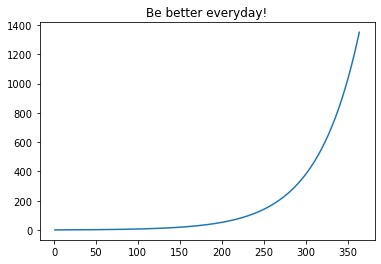

In [122]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

ability = 1
scale = 1.02
records = []

days = range(1, 365)
for day in days:
    ability = ability*scale
    records.append(ability)
 

plt.plot(days, records)
plt.title('Be better everyday!')

### 安装包的方法
1. 命令行执行 ``pip install packagename``
2. jupyter notebook的Cell中执行``!pip install packagename``
3. 如果是mac，pip写成pip3

In [ ]:
!pip install matplotlib

### 练习2
**打印九九乘法表格**
![](img/九九乘法表2.png)
用到的知识点:
- for循环
- 字符串format方法
- print函数(涉及到end参数)

In [125]:
for row in range(1, 10):
    #print(row)
    for col in range(1, row+1):
        formula = '{col}*{row}={res}'.format(col=col, row=row, res=col*row)
        print(formula, end='\t')
    print('')

1*1=1	
1*2=2	2*2=4	
1*3=3	2*3=6	3*3=9	
1*4=4	2*4=8	3*4=12	4*4=16	
1*5=5	2*5=10	3*5=15	4*5=20	5*5=25	
1*6=6	2*6=12	3*6=18	4*6=24	5*6=30	6*6=36	
1*7=7	2*7=14	3*7=21	4*7=28	5*7=35	6*7=42	7*7=49	
1*8=8	2*8=16	3*8=24	4*8=32	5*8=40	6*8=48	7*8=56	8*8=64	
1*9=9	2*9=18	3*9=27	4*9=36	5*9=45	6*9=54	7*9=63	8*9=72	9*9=81	


In [126]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



## 列表推导式

### 问题1 用列表表示集合X

$X= \{x| x \in [1,2,3,4,5,6,7,8,9,10]\}$

In [127]:
X = [1,2,3,4,5,6,7,8,9,10]
X

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [128]:
X = list(range(1, 10))
X

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### 问题2 表示集合Y
$Y = \{x^2| x \in [1,2,3,4,5,6,7,8,9,10]\}$

In [129]:
Y = []

for x in X:
    Y.append(x*x)
    
Y

[1, 4, 9, 16, 25, 36, 49, 64, 81]

### 列表推导式

实现步骤
1. 先复制X
2. 再对X中的元素x进行操作

In [ ]:
#先复制X
[x for x in X]

In [ ]:
#再对x进行操作
[x*x for x in X]

### 理解列表推导式

![](img/列表推导式理解.JPG)

### 带条件的列表推导式
$C= \{x^2 | (x \in X) \cap (x>5)\}$

In [131]:
#复制X
[x for x in X]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [132]:
#X中的要大于5
#[x for x in X if x>5]


[x 
 for x in X 
 if x>5]

[6, 7, 8, 9]

In [133]:
#对满足条件的x进行操作
#[x*x for x in X if x>5]

[x*x 
 for x in X 
 if x>5]

[36, 49, 64, 81]

### 问题3 全部小写

In [134]:
words = ['Life', 'is', 'short', 'so', 'we', 'use', 'Python', 'python', 
         'is', 'easy', 'to', 'learn', 'and', 'easy', 'to', 'use']
words

['Life',
 'is',
 'short',
 'so',
 'we',
 'use',
 'Python',
 'python',
 'is',
 'easy',
 'to',
 'learn',
 'and',
 'easy',
 'to',
 'use']

In [135]:
lower_words = [w.lower() for w in words]
lower_words

['life',
 'is',
 'short',
 'so',
 'we',
 'use',
 'python',
 'python',
 'is',
 'easy',
 'to',
 'learn',
 'and',
 'easy',
 'to',
 'use']

### 问题4 计算lower_words列表数据的单词词频

In [136]:
wordset = set(lower_words)
[(w, lower_words.count(w)) for w in wordset]

[('and', 1),
 ('short', 1),
 ('so', 1),
 ('learn', 1),
 ('use', 2),
 ('is', 2),
 ('python', 2),
 ('easy', 2),
 ('to', 2),
 ('we', 1),
 ('life', 1)]

In [137]:
#1 生产词语集合
wordset = set(lower_words)
print(wordset)

{'and', 'short', 'so', 'learn', 'use', 'is', 'python', 'easy', 'to', 'we', 'life'}


In [138]:
#2. wordset复制wordset自己
[w for w in wordset]

['and',
 'short',
 'so',
 'learn',
 'use',
 'is',
 'python',
 'easy',
 'to',
 'we',
 'life']

In [139]:
#3. 对wordset中每个词语w进行一些操作
[lower_words.count(w) for w in wordset]

[1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1]

In [140]:
#3. 词频和词语一起显示
[(w,lower_words.count(w)) for w in wordset]

[('and', 1),
 ('short', 1),
 ('so', 1),
 ('learn', 1),
 ('use', 2),
 ('is', 2),
 ('python', 2),
 ('easy', 2),
 ('to', 2),
 ('we', 1),
 ('life', 1)]

### 问题5

```python
d = {'x': 'A', 
     'y': 'B', 
     'z': 'C' }
```

如何将d中的 键值对 拼接,输出为

``['xA', 'yB', 'zC]``

In [141]:
d = {'x': 'A', 
     'y': 'B', 
     'z': 'C' }

d.items()

dict_items([('x', 'A'), ('y', 'B'), ('z', 'C')])

In [142]:
#1 自己复制d.items()自己
[i for i in d.items()]

[('x', 'A'), ('y', 'B'), ('z', 'C')]

In [143]:
#2 对任何一个元素都要进行字符串的拼接操作
[i[0]+i[1] for i in d.items()]

['xA', 'yB', 'zC']

## 函数

可重复使用的代码块

![](img/函数.png)

def函数常见参数定义&调用方式
- 位置参数
- 关键词参数
- 默认参数


### 位置参数

In [148]:
def xy1(x, z):
    y = x**2 + x + z
    return y

xy1(4, 1)

21

In [149]:
def hello1(name, age):
    return '我是{0},今年{1}'.format(name, age)
    
hello1('张三', 25)

'我是张三,今年25'

In [150]:
hello1(25,'张三')

'我是25,今年张三'

### 关键词参数

In [151]:
def hello2(name, age):
    return '我是{0},今年{1}'.format(name, age)
    
    
hello2(name='张三', age=25)

'我是张三,今年25'

In [152]:
hello2(age=25, name='张三')

'我是张三,今年25'

### 默认参数

In [153]:
def hello3(name, age, gender='男'):
    return '我是{0},今年{1}, 性别{2}'.format(name, age, gender)

    
hello3('David', 25)

'我是David,今年25, 性别男'

In [154]:
hello3('David', 25, gender='male')

'我是David,今年25, 性别male'

## 常见函数

### 重点函数

- sorted(lst， ascending)
- range(start, end, step)
- enumerate(lst)
- eval(expression)
- zip(lst1, lst2..)
- map(func, lst)
- print(x)
- open(file, encoding)

### 数学相关

| 函数                        | 功能                                                         | 例子              | 运行结果    |
| --------------------------- | ------------------------------------------------------------ | ----------------- | ----------- |
| abs(a)                      | 对a取绝对值                                                  | abs(-1)           | 1           |
| max(lst)、min(lst)          | 寻找lst中的最大、最小值                                      | max([3, 2, 9])    | 9           |
| sum(lst)                    | 对lst内所有数字求和                                          | sum([3, 2, 9])    | 14          |
| ==sorted(lst， ascending)== | 对lst排序； 参数ascending为布尔值控制升降序                  | sorted([3, 2, 9]) | [2, 3, 9]   |
| ==range(start, end, step)== | 以步长step，生成从start到end的数列,默认step=1，结果取不到end | list(range(1,5))  | [1, 2, 3,4] |

### 类型转换

| 函数               | 功能                                                       | 例子                             | 运行结果                      |
| ------------------ | ---------------------------------------------------------- | -------------------------------- | ----------------------------- |
| int(string)        | 将字符串数改为整数型                                       | int('9')                         | 9                             |
| float(int/str)     | 将int或str改为浮点型                                       | float(9)、float('9')             | 9.0                           |
| list(iterable)     | 将可迭代对象为列表。这里的iterable可以为字符串，可以是列表 | list('abc')                      | ['a', 'b', 'c']               |
| ==enumerate(lst)== | 返回带有索引值的序列seq.==需要list(seq)处理后才能看到seq== | list(enumerate(['a', 'b', 'c'])) | [(0,'a'), (1, 'b'), (2, 'c')] |
| tuple(lst)         | 将lst变为tuple                                             | tuple([1,2,3])                   | (1,2,3)                       |
| set(lst)           | 将lst变为集合                                              | set([1,4,4,4,3])                 | {1,3,4}                       |

### 功能函数

| 函数                      | 功能                                                        | 例子                           | 运行结果                 |
| ------------------------- | ----------------------------------------------------------- | ------------------------------ | ------------------------ |
| ==eval(expression)==      | 执行一个表达式                                              | eval('1+1')                    | 2                        |
| ==zip(lst1,lst2...)==     | 将lst1,lst2...合并,返回zip对象。==需要list处理一下zip对象== | list(zip([1,2,3],[4,5,6]))     | [(1, 4), (2, 5), (3, 6)] |
| ==type(x)==               | 查看X的类型                                                 | type('2')                      | <class 'str'>            |
| help(x)                   | 查看X的相关信息                                             | help([1, 2])                   | Help on list object..    |
| ==map(func, lst)==        | 对lst中的每一个个体都进行func操作                           | list(map(sum, [[1,1], [1,2]])) | [2, 3]                   |
| ==print(x)==              | 打印x                                                       | print('abc')                   | Abc                      |
| ==open(file， encoding)== | 打开file文件， encoding是file的文件编码                     |                                |                          |



## Python内置常用函数

有三大类
- 数学相关函数
- 类型转化函数
- 功能函数

### 数学相关

| 函数                        | 功能                                                         | 例子              | 运行结果    |
| --------------------------- | ------------------------------------------------------------ | ----------------- | ----------- |
| abs(a)                      | 对a取绝对值                                                  | abs(-1)           | 1           |
| max(lst)、min(lst)          | 寻找lst中的最大、最小值                                      | max([3, 2, 9])    | 9           |
| sum(lst)                    | 对lst内所有数字求和                                          | sum([3, 2, 9])    | 14          |
| **sorted(lst， reverse)** | 对lst排序； 参数reverse为布尔值控制升降序                  | sorted([3, 2, 9]) | [2, 3, 9]   |
| **range(start, end, step)** | 生成以步长step，生成从start到end的数列,默认step=1，结果取不到end | list(range(1,5))  | [1, 2, 3,4] |


In [155]:
#取绝对值
abs(-1)

1

In [156]:
#取最大
max([3, 2, 9])

9

In [157]:
#取最小
min([3, 2, 9])

2

In [158]:
#求和
sum([3, 2, 9])

14

In [159]:
#排序
sorted([3,2,9])

[2, 3, 9]

In [160]:
#排序(方向调整)
sorted([3,2,9], reverse=True)

[9, 3, 2]

In [161]:
#生成序列
list(range(1, 10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [162]:
list(range(1, 10, 2))

[1, 3, 5, 7, 9]


### 类型转换

| 函数               | 功能                                                       | 例子                             | 运行结果                      |
| ------------------ | ---------------------------------------------------------- | -------------------------------- | ----------------------------- |
| int(string)        | 将字符串数改为整数型                                       | int('9')                         | 9                             |
| float(int/str)     | 将int或str改为浮点型                                       | float(9)、float('9')             | 9.0                           |
| list(iterable)     | 将可迭代对象为列表。这里的iterable可以为字符串，可以是列表 | list(range(1,5))                      | ``[1,2,3,4] ``              |
| enumerate(lst) | 返回带有索引值的序列seq,**需要list(seq)处理后才能看到seq** | list(enumerate(['a', 'b', 'c'])) | [(0,'a'), (1, 'b'), (2, 'c')] |
| tuple(lst)         | 将lst变为tuple                                             | tuple([1,2,3])                   | (1,2,3)                       |
| set(lst)           | 将lst变为集合                                              | set([1,4,4,4,3])                 | {1,3,4}                       |


In [163]:
a = 9
b = 9

a+b

18

In [164]:
#变转化为整数
int('9')

9

In [165]:
#转化为小数
float('9')

9.0

In [166]:
float(9)

9.0

In [167]:
#转化为列表
list(range(1, 5))

[1, 2, 3, 4]

In [168]:
#给列表中每个元素分配一个索引值
names = ['张三', '李四', '王五']

list(enumerate(names))

[(0, '张三'), (1, '李四'), (2, '王五')]


### 功能函数

| 函数  | 功能 | 例子 | 运行结果 |
| --- | ---| --- | --- |
| **eval(expression)** | 执行一个字符串表达式| eval('1+1')| 2  |
| **zip(lst1,lst2...)**     | 将lst1,lst2...合并,返回zip对象。**需要list处理一下zip对象** | list(zip([1,2,3],[4,5,6]))  | [(1, 4), (2, 5), (3, 6)] |
| **type(x)** | 查看X的类型 | type('2')  | <class 'str'>  |
| **help(x)** | 查看X的相关信息 | help([1, 2]) | Help on list object..    |
| **map(func, lst)**  | 对lst中的每一个个体都进行func操作| list(map(sum, [[1,1], [1,2]])) | [2, 3]                   |
| **print(value, end='\n')**| 打印value| print('abc')| abc |
| **open(file， encoding)** | 打开file文件， encoding是file的文件编码 |  ||


### eval()
eval(str_expression)

str_expression 是字符串表达式，可以是变量、函数等

In [169]:
a = 9
b = 9
c = 'a+b'

print(a+b)
print(c)
print(eval(c))

18
a+b
18


In [170]:
eval('a+b')

18

In [171]:
d = 'hello world'
print('d')
print(eval('d'))

d
hello world


In [172]:
def hello():
    print('hello python')
    
print('hello()')

hello()


In [173]:
eval('hello()')

hello python


### zip(lst1, lst2,lst3...)
将lst1， lst2， lst3按照顺序进行合并

In [174]:
names = ['David', 'Mary', 'Henry', 'Unique']
sexs = ['male', 'femal', 'male', 'male']
ages = [25, 22, 30, 40]

list(zip(names, sexs, ages))

[('David', 'male', 25),
 ('Mary', 'femal', 22),
 ('Henry', 'male', 30),
 ('Unique', 'male', 40)]

### type/help
查看数据类型、查看感兴趣对象的介绍

In [175]:
a = [1,3,5]
type(a)

list

In [176]:
help(a)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [177]:
type(print)

builtin_function_or_method

In [ ]:
help(print)

### map(func, lst)映射运算
将func运算映射到lst上每个元素

In [178]:
lst = [[1,1], [1,2], [1,2], [1,2], [1,2], [1,2], [1,2]]

res = map(sum, lst)
list(res)

[2, 3, 3, 3, 3, 3, 3]

### print(value, end='\n')
打印value，默认使用换行结束

In [179]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [180]:
print('hello world!')
print('hello python!')

hello world!
hello python!


In [181]:
print('hello world!', end='\t')
print('hello python!')

hello world!	hello python!


### open(file, mode='r', encoding=None)
- file 文件路径
- mode 操作方式们，最常用的是r和a+。r读取， a+是追加写入
- encoding 编码方式 ，常见的文件编码方式主要是utf-8和gbk

读取返回io对象

io对象有read()方法


### 相对路径VS绝对路径


相对路径  data

绝对路径 C:Users\thunderhit\Desktop\Python数据分析入门\02-Python语法入门\data

以后都要用相对路径

In [182]:
# 读取数据
open('data/test.txt', encoding='utf-8').read()

'章节设计\n\n第一部分  环境配置\n第二部分  快速入门python\n第三部分  网络爬虫\n第四部分  简单的文本分析\n第五部分  进阶文本分析'

In [183]:
# 新建文件/在已有的文件内插入内容
f = open('data/test2.txt', mode='a+', encoding='utf-8')
f.write('我在学python，现在是下午五点')
f.close()

In [184]:
# 新建文件/在已有的文件内插入内容
f = open('data/test2.txt', mode='a+', encoding='utf-8')
f.write('\nLife is short, so to learn Python')
f.close()

In [185]:
# 新建文件/在已有的文件内插入内容
f = open('data/test2.txt', mode='a+', encoding='utf-8')
f.write('\nLife is short, so to learn Python')
f.write('\nLife is short, so to learn music')
f.write('\nLife is short, so to learn english')
f.close()

### 重点函数

- [x] sorted(lst， ascending)
- [x] range(start, end, step)
- [x] enumerate(lst)
- [x] eval(expression)
- [x] zip(lst1, lst2..)
- [x] map(func, lst)
- [x] print(x)
- [x] open(file, mode, encoding)

## 内置库之文件路径pathlib库

- 相对路径 ``'img'`` 
- 绝对路径  ``'C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/img'``

In [186]:
import pathlib

#当前代码所在的文件夹的相对路径
pathlib.Path()

WindowsPath('.')

In [187]:
from pathlib import Path

#当前代码所在的文件夹的相对路径
Path()

WindowsPath('.')

### pathlib.Path()属性方法
|方法|功能|
|:---|:---|
|**cwd()**|获取代码所在的当前工作路径|
|**joinpath(...grandpadir, fatherdir, ...file)**|生成路径|
|**iterdir()**|返回某路径下的文件(夹)目录|
|**glob(pattern)**|返回符合pattern的所有文件的文件路径|
|is_file()|判断某路径是否为文件，返回布尔值|
|is_dir()|判断某路径是否为文件夹，返回布尔值|
|exists()|判断某路径是否存在，返回布尔值|
|mkdir(parents=True, exist_ok=True)|创建某路径对应的文件夹|

#### cwd() 
**例**：获取当前代码所在文件夹的绝对路径

In [ ]:
Path().cwd()

#### joinpath(...grandpadir, fatherdir, ...file)
把...grandpadir, fatherdir, ...file加入到某路径中

**例**：获得data文件夹的路径

In [ ]:
Path().cwd().joinpath('data')

**例**：获得data/test.txt文件的路径

In [ ]:
Path().cwd().joinpath('data', 'test.txt')

#### iterdir()
返回某路径下的文件(夹)目录

例：获得**02-Python语法入门**文件夹里的所有文件(夹)路径

In [ ]:
list(Path().cwd().iterdir())

### glob(pattern)
查找某路径内满足pattern的所有文件路径 。

``pattern='*.*'`` 匹配任意格式任意名字的文件

``pattern='*.txt'`` 匹配出所有的txt文件


**例**：获得data文件夹内的所有的文件路径

In [ ]:
list(Path().cwd().joinpath('data').glob('*.*'))

**例**：获得data文件夹内的所有的txt额路径

In [ ]:
list(Path().cwd().joinpath('data').glob('*.txt'))

**例**：获得data/reports内的pdf路径

In [ ]:
dirs = Path().cwd().joinpath('data', 'reports').iterdir()
dirs = list(dirs)
for dir in dirs:
    files = dir.glob('*.*')
    for file in files:
        print(file)

**例**：获得data/reports内的 含有"_n" 额pdf路径

In [ ]:
dirs = Path().cwd().joinpath('data', 'reports').iterdir()
dirs = list(dirs)
for dir in dirs:
    files = dir.glob('*_n.pdf')
    for file in files:
        print(file)

### is_file()
判断某路径是否为一个文件。返回布尔值：
- True 真实存在的文件路径
- False 不真实存在或者文件夹路径

**例** 'C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/data/test.txt'是文件路径？

In [ ]:
fpath = Path('C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/data/test.txt')
fpath.is_file()

In [ ]:
fpath = Path('C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/data/test222.txt')
fpath.is_file()

### is_dir()
判断某路径是否为一个文件夹。返回布尔值，True、False

**例**： 'C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/data' 是 文件夹路径？

In [ ]:
fpath = Path('C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/data')
fpath.is_dir()

### exists()
判断某路径是否存在。返回布尔值，True、False


例： 'C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/data' 是否存在？

In [ ]:
fpath = Path('C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/data')
fpath.exists()

In [ ]:
fpath = Path('C:/Users/thunderhit/Desktop/Python数据分析入门/02-Python语法入门/datasss')
fpath.exists()

### mkdir(parents=True, exist_ok=True)

创建某路径

In [ ]:
path = Path().cwd().joinpath('data', 'stocks', '800000')
path.mkdir(parents=True, exist_ok=True)

## 内置库之csv文件库

### csv存储数据代码步骤
1. 新建一个csv文件

```python
import csv
path = 'data/test.csv'
csvf = open(path, 'a+', encoding='utf-8', newline='')
```

2. 定义字段名，并初始化csv文件为writer

```python
fieldnames = ['name', 'age']
writer = csv.DictWriter(csvf, fieldnames=fieldnames)
writer.writeheader()
```

3. 将待存储数据整理为字典格式

```python
test_data = {'name': 'David',
             'age': 25}
```

4. 用writer往csv中存储数据

```python
writer.writerow(test_data)
```

5. 最后记得关闭csv文件

```python
csvf.close()
```

In [ ]:
import csv

csvf = open('data/test1.csv', 'a+', encoding='utf-8', newline='')
fieldnames = ['name', 'age']
writer = csv.DictWriter(csvf, fieldnames=fieldnames)
writer.writeheader()


csvf.close()

In [ ]:
import csv

csvf = open('data/test2.csv', 'a+', encoding='utf-8', newline='')
fieldnames = ['name', 'age']
writer = csv.DictWriter(csvf, fieldnames=fieldnames)
writer.writeheader()

test_data = {'name': 'David',
             'age': 25}
writer.writerow(test_data)

csvf.close()

### 很多数据的存储

In [188]:
datas = [{'name': 'David', 'age': 25}, 
         {'name': 'Mary', 'age': 30},
         {'name': 'Henry', 'age': 35}]

datas

[{'name': 'David', 'age': 25},
 {'name': 'Mary', 'age': 30},
 {'name': 'Henry', 'age': 35}]

In [189]:
import csv

csvf = open('data/test2.csv', 'a+', encoding='utf-8', newline='')
fieldnames = ['name', 'age']
writer = csv.DictWriter(csvf, fieldnames=fieldnames)
writer.writeheader()

for data in datas:
    writer.writerow(data)

csvf.close()

## 内置库之正则表达式re库
### 一、正则表达式中的符号

按照符号的功能，我将其分为三类，一般情况下表达式都是由这三种符号组成的。

### 1.1 正则字符
|正则符号|描述|匹配自己时|
|:---|:---|:---|
|``\``|	转义字符。例如， 'n' 匹配字符 'n'。|``'\n'``|
|``( )``|标记一个子表达式的开始和结束位置。|``\(   \)``|
|.|	匹配除换行符 ``\n`` 之外的任何单字符。|``\. ``|
|\|| \|左右两侧均可参与匹配|
|\d|匹配字符串中的单个数字||
|a-zA-Z|匹配全部英文字符||
|0-9|匹配全部数字||
|``\s``|匹配字符串中的``\n``,``\t``,``空格``||
|``[]``| 中括号内任意正则符号均可参与匹配|``\[   \]``|
|^|当在方括号表达式中使用，^对其后的正则表达式进行了反义表达。|``\^``|


### 1.2 限定字符

|正则符号|描述|匹配自己时|
|:---|:---|:---|
|\*|	匹配前面的子表达式零次或多次。| ``\*``|
|?|	匹配前面的子表达式零次或一次|\\?|
|+|匹配前面的子表达式一次或多次。|``\+``|
|{m}|n 是一个非负整数。匹配确定的 m 次。|
|{m,}|m 是一个非负整数。至少匹配m 次。|
|{m, n}|	m 和 n 均为非负整数，其中m <= n。最少匹配 m 次且最多匹配 n 次。|


### 1.3 定位字符
|正则符号|描述|匹配自己时|
|:---|:---|:---|
|^|匹配输入字符串的开始位置。|``\^``|
|$|匹配输入字符串的结尾位置|``\$``|
| \b |匹配一个单词边界，即字与空格间的位置||
| \B|非单词边界匹配||


### 二、re库常用方法

|re库常用函数|作用|
|:---|:---|
|``re.findall(pattern, string)``|根据pattern返回匹配结果（列表）|
|``re.split(pattern, string)`` |使用pattern分割string，返回列表        
|``re.sub(pattern, repl, string)``|使用repl替换string中的pattern|


### 三、只需要掌握
- 搜索引擎检索到自己需要的正则表达式
- 最简单最好用表达式``(.*?)``
- 在[正则表达式测试网站]( http://c.runoob.com/front-end/854 )验证自己的正则表达式


### 3.1 检索找到自己需要的正则表达式
比如我只需要中文，其余字符统统不要。

我会在百度搜**中文正则表达式**

发现很多网页中网友提到````，于是

``[\u4e00-\u9fa5]``

In [ ]:
import re

pattern = '[\u4e00-\u9fa5]+'

string = """Python是一门面向对象的编程语言，诞生于1991年。\
目前以广泛应用在网站开发、游戏软件开发、数据采集、机器学习等多个领域。\
一般情况下Python是Java的20%，所以说人生苦短，我用Python。"""

chinese_words = re.findall(pattern, string)
chinese_text = ''.join(chinese_words)
chinese_text

### 3.2 最简单最好用表达式(.*?)
**pattern设计步骤：**

**正则符号**组成**正则表达式**，用于**匹配**需要的字符。

1. 找到重复的一致的规律
2. 复制粘贴到pattern中
3. 扣掉**想要的数据**
4. 替换为``(.*?)``  或者``相应的正则符号表达式*``


比如现在需要快速挖掘出intros中的姓名、籍贯和年龄

In [ ]:
import re


pattern = '我叫(.*?)，来自(.*?)，今年(.*?)岁。'

intros = ['我叫张三，来自山东，今年25岁。',
          '我叫李四，来自河北，今年28岁。',
          '我叫王五，来自河南，今年24岁。']

for intro in intros:
    info = re.findall(pattern, intro)
    print(info)

**特别需要注意的是pattern中的(.*?)左右两侧必须有字符，否则匹配失败**

In [ ]:
import re


pattern = '(.*?)，来自(.*?)，今年(.*?)'

intros = ['我叫张三，来自山东，今年25岁。',
          '我叫李四，来自河北，今年28岁。',
          '我叫王五，来自河南，今年24岁。']

for intro in intros:
    info = re.findall(pattern, intro)
    print(info)

由于

``'(.*?)，来自(.*?)，今年(.*?)'``

中最左侧和最右侧的``(.*?)``没有被其他字符左右包裹，导致匹配姓名和年龄失败。

In [ ]:
import re


pattern = '叫(.*?)，来自(.*?)，今年(.*?)岁'

intros = ['我叫张三，来自山东，今年25岁。',
          '我叫李四，来自河北，今年28岁。',
          '我叫王五，来自河南，今年24岁。']

for intro in intros:
    info = re.findall(pattern, intro)
    print(info)

### 四、案例 
### 4.1 找出文本中出现的年份

In [ ]:
import re


pattern = '\d{4}'
string = """Python是一门面向对象的编程语言，诞生于1991年。\
目前以广泛应用在网站开发、游戏软件开发、数据采集、机器学习等多个领域。\
一般情况下Python是Java的20%，所以说人生苦短，我用Python。"""

re.findall(pattern, string)

### 4.2 re.split(pattern, string)
断句

In [ ]:
pattern = '；|。'

string = """Python是一门面向对象的编程语言，诞生于1991年；\
目前以广泛应用在网站开发、游戏软件开发、数据采集、机器学习等多个领域。\
一般情况下Python是Java的20%，所以说人生苦短，我用Python。"""

res = re.split(pattern, string)
res = [r for r in res if r]
res

### 4.3 re.sub(pattern, repl, string)
将数字替换为NUM

In [ ]:
pattern = '\d+'

repl = 'NUM'

string = """Python是一门面向对象的编程语言，诞生于1991年。\
一般情况下Python是Java的20%，所以说人生苦短，我用Python。"""

re.sub(pattern, repl, string)


### 4.4 . 统一表达
将指代同一个主体的不同表达词语统一为同一个词

In [ ]:
text = '中国铁路工程集团有限公司成立于1950年3月，总部位于北京。目前中国中铁已经发展成中国和亚洲最大的多功能综合型建设集团。'

pattern = '中国铁路工程集团有限公司|中国中铁'

repl = '中铁'

re.sub(pattern, repl, text)

In [ ]:
text = '中国铁路工程集团有限公司成立于1950年3月，总部位于北京。目前中国中铁已经发展成中国和亚洲最大的多功能综合型建设集团。'

pattern = '[中国铁路工程集团有限公司|中国中铁]+'

repl = '中铁'

re.sub(pattern, repl, text)

### 4.5 分割文本数据的章节

一二三四五六七八九十零百

In [ ]:
text = """ 第一篇 Python简介 第二篇 Python入门语法 第三篇 Python网络爬虫 第四篇 文本数据编码 第五篇 数据分析 第六篇 可视化"""

pattern = '第[一二三四五六七八九十零百]+篇'

res = re.split(pattern, text)
res = [r.replace(' ', '') for r in res if ' '!=r]
res

### 4.6 抽取出数字
比如日期数据

In [ ]:
text = '中国铁路工程集团有限公司成立于1950年3月，总部位于北京。目前中国中铁已经发展成中国和亚洲最大的多功能综合型建设集团。'

pattern = '\d+'

'-'.join(re.findall(pattern, text))

## 初学python常出错误汇总

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-忘记写冒号" data-toc-modified-id="1.-忘记写冒号-1">1. 忘记写冒号</a></span></li><li><span><a href="#2.-误用-=" data-toc-modified-id="2.-误用-=-2">2. 误用 <code>=</code></a></span></li><li><span><a href="#3.-错误的缩进" data-toc-modified-id="3.-错误的缩进-3">3. 错误的缩进</a></span></li><li><span><a href="#4.-变量没有定义" data-toc-modified-id="4.-变量没有定义-4">4. 变量没有定义</a></span></li><li><span><a href="#5.-中英文输入法导致的错误" data-toc-modified-id="5.-中英文输入法导致的错误-5">5. 中英文输入法导致的错误</a></span></li><li><span><a href="#6.-不同数据类型的拼接" data-toc-modified-id="6.-不同数据类型的拼接-6">6. 不同数据类型的拼接</a></span></li><li><span><a href="#7.-索引位置问题" data-toc-modified-id="7.-索引位置问题-7">7. 索引位置问题</a></span></li><li><span><a href="#8.-使用字典中不存在的键" data-toc-modified-id="8.-使用字典中不存在的键-8">8. 使用字典中不存在的键</a></span></li><li><span><a href="#9.-忘了括号" data-toc-modified-id="9.-忘了括号-9">9. 忘了括号</a></span></li><li><span><a href="#10.-漏传参数" data-toc-modified-id="10.-漏传参数-10">10. 漏传参数</a></span></li><li><span><a href="#11.-缺失依赖库" data-toc-modified-id="11.-缺失依赖库-11">11. 缺失依赖库</a></span></li><li><span><a href="#12.-使用了python中的关键词" data-toc-modified-id="12.-使用了python中的关键词-12">12. 使用了python中的关键词</a></span></li><li><span><a href="#13.-文件编码问题" data-toc-modified-id="13.-文件编码问题-13">13. 文件编码问题</a></span></li></ul></div>

### 1. 忘记写冒号
在 if、elif、else、for、while、def语句后面忘记添加 ``:``

In [ ]:
age = 42

if age == 42
    print('Hello!')

In [ ]:
age = 42

if age == 42:
    print('Hello!')

### 2. 误用 ``=`` 
``=`` 是赋值操作，而判断两个值是否相等是 ``==``

In [ ]:
gender = '男'

if gender = '男':
    print('Man')

In [ ]:
gender = '男'

if gender == '男':
    print('Man')

### 3. 错误的缩进

Python用缩进区分代码块，常见的错误用法：

In [190]:
print('Hello!')
 print('Howdy!')

IndentationError: unexpected indent (Temp/ipykernel_10264/1063544861.py, line 2)

In [ ]:
print('Hello!')
print('Howdy!')

In [192]:
num = 25
if num == 25:
print('Hello!')

IndentationError: expected an indented block (Temp/ipykernel_10264/496658320.py, line 3)

In [191]:
num = 25
if num == 25:
    print('Hello!')

Hello!


### 4. 变量没有定义

In [193]:
if ct in ['New York', 'Bei Jing', 'Tokyo']:
    print('This is a mega city')

NameError: name 'ct' is not defined

In [194]:
city ='New York'
if city in ['New York', 'Bei Jing', 'Tokyo']:
    print('This is a mega city')

This is a mega city


### 5. 中英文输入法导致的错误
- 英文冒号
- 英文括号
- 英文逗号
- 英文单双引号

In [195]:
if 5>3：
    print('5比3大')

SyntaxError: invalid character '：' (U+FF1A) (Temp/ipykernel_10264/2342601262.py, line 1)

In [ ]:
if 5>3:
    print('5比3大')

In [ ]:
spam = [1, 2， 3]

In [ ]:
if 5>3:
    print('5比3大')

### 6. 不同数据类型的拼接

同种数据类型  **字符串/列表/元组**   支持拼接

**字典/集合**不支持拼接

In [196]:
'I have ' + 12 + ' eggs.'

TypeError: can only concatenate str (not "int") to str

In [197]:
'I have {} eggs.'.format(12)

'I have 12 eggs.'

In [198]:
['a', 'b', 'c']+'def'

TypeError: can only concatenate list (not "str") to list

In [199]:
('a', 'b', 'c')+['a', 'b', 'c']

TypeError: can only concatenate tuple (not "list") to tuple

In [200]:
set(['a', 'b', 'c'])+set(['d', 'e'])

TypeError: unsupported operand type(s) for +: 'set' and 'set'

In [201]:
grades1 = {'Mary':99, 'Henry':77}
grades2 = {'David':88, 'Unique':89}

grades1+grades2

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

### 7. 索引位置问题

In [203]:
spam = ['cat', 'dog', 'mouse']
print(spam[5])

IndexError: list index out of range

### 8. 使用字典中不存在的键
在字典对象中访问 key 可以使用 ``[]``，

但是如果该 key 不存在，就会导致：KeyError: 'zebra'

In [204]:
spam = {'cat': 'Zophie', 
        'dog': 'Basil', 
        'mouse': 'Whiskers'}

print(spam['zebra'])

KeyError: 'zebra'

In [205]:
spam = {'cat': 'Zophie', 
        'dog': 'Basil', 
        'mouse': 'Whiskers'}
# 为了避免这种情况，可以使用 get 方法，key 不存在时，get 默认返回 None
print(spam.get('zebra'))

None


### 9. 忘了括号
当函数中传入的是函数或者方法时，容易漏写括号

In [206]:
spam = {'cat': 'Zophie', 
        'dog': 'Basil', 
        'mouse': 'Whiskers'}

print(spam.get('zebra')  #end of funtion

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_10264/2572607692.py, line 5)

In [207]:
spam = {'cat': 'Zophie', 
        'dog': 'Basil', 
        'mouse': 'Whiskers'}

print(spam.get('zebra')) 

None


### 10. 漏传参数

In [ ]:
def diyadd(x, y, z):
    return x+y+z

diyadd(1, 2)

In [ ]:
diyadd(1, 2, 4)

### 11. 缺失依赖库
电脑中没有相关的库

In [ ]:
!pip install packagename

### 12. 使用了python中的关键词

如try、except、def、class、object、None、True、False等

In [208]:
try = 5
print(try)

SyntaxError: invalid syntax (Temp/ipykernel_10264/3569836141.py, line 1)

In [209]:
a = 5
print(a)

5


In [210]:
def = 6
print(def)

SyntaxError: invalid syntax (Temp/ipykernel_10264/723079031.py, line 1)

In [211]:
d = 6
print(d)

6


### 13. 文件编码问题

In [212]:
import pandas as pd

df = pd.read_csv('data/twitter_sentiment.csv')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 31589-31590: invalid continuation byte

In [213]:
import pandas as pd

#gbk/utf-8只能解决大部分编码问题，但不能解决全部问题
df = pd.read_csv('data/twitter_sentiment.csv', encoding='gbk')
df.head()

UnicodeDecodeError: 'gbk' codec can't decode byte 0xbd in position 10864: illegal multibyte sequence

### 那怎么找到正确的编码参数呢？

上面的程序会提示编码错误， 尝试encoding编码参数传入utf-8、gbk，也没有解决问题。

In [214]:
import chardet

#读取为二进制数据
binary_data = open('data/twitter_sentiment.csv', 'rb').read()

#传给chardet.detect，稍等片刻
chardet.detect(binary_data)

{'encoding': 'Windows-1252', 'confidence': 0.7291192008535122, 'language': ''}

In [215]:
import pandas as pd


df = pd.read_csv('data/twitter_sentiment.csv', encoding='Windows-1252')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


### 14. 路径字符串写法

- Mac&Win 推荐使用 ``/`` 写法
- 如果使用``\`` 写法，安全起见，请换成``\\``  （Mac不支持``\\`` ）


```
\n
\t
\d
```

In [216]:
open('data/test.txt', encoding='utf-8').read()

'章节设计\n\n第一部分  环境配置\n第二部分  快速入门python\n第三部分  网络爬虫\n第四部分  简单的文本分析\n第五部分  进阶文本分析'

In [217]:
open('data\test.txt', encoding='utf-8').read()

OSError: [Errno 22] Invalid argument: 'data\test.txt'

In [218]:
open('data\\test.txt', encoding='utf-8').read()

'章节设计\n\n第一部分  环境配置\n第二部分  快速入门python\n第三部分  网络爬虫\n第四部分  简单的文本分析\n第五部分  进阶文本分析'

In [219]:
open('data\Test.txt', encoding='utf-8').read()

'章节设计\n\n第一部分  环境配置\n第二部分  快速入门python\n第三部分  网络爬虫\n第四部分  简单的文本分析\n第五部分  进阶文本分析'